## Data Analysis and Visualization of the Bigger Dataset

As seen in the other two notebooks we had to oversample the threee miniority classes, resulting in poor performance on level 3 model.

In this notebook we will try to get more real data instead of oversampling the minority classes.

We've obtained the data as a parquet file from Kaggle [Complete CICIDS Dataset](https://www.kaggle.com/datasets/dhoogla/cicidscollection?resource=download)



In [ ]:
#!pip install fastparquet
#%pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ------ -------------------------------- 19.7/124.9 MB 103.7 MB/s eta 0:00:02
   -------------- ------------------------ 45.1/124.9 MB 110.4 MB/s eta 0:00:01
   ---------------------- ---------------- 70.8/124.9 MB 112.8 MB/s eta 0:00:01
   ---------------------------- ---------- 91.0/124.9 MB 107.6 MB/s eta 0:00:01
   ----------------------------------- -- 116.7/124.9 MB 109.6 MB/s eta 0:00:01
   -------------------------------------  124.8/124.9 MB 110.7 MB/s eta 0:00:01
   -------------------------------------  124.8/124.9 MB 110.7 MB/s eta 0:00:01
   -------------------------------------  124.8/124.9 MB 110.7 MB/s eta 0:00:01
   -------------------------------------  124.8/124.9 MB 110.7 MB/s eta 0:00:01
   -------------------------------------  124.8/124.9 MB 110.7 MB/s eta 0:00:01
   -------------------------------------  124.8/124.9 MB 110.7 MB/s eta 0:00:01
   --------------------------------------- 124.9/

In [30]:
from fastparquet import ParquetFile
import pandas as pd
import numpy as np

In [31]:
data = pd.read_parquet('Datasets/Complete/cic-collection.parquet')


In [32]:
data.describe()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Mean,...,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,9.167581e+06,9.167581e+06,9.167581e+06,9.167581e+06,9.167581e+06,9.167581e+06,9.167581e+06,9.167581e+06,9.167581e+06,9.167581e+06,...,9.167581e+06,9.167581e+06,9.167581e+06,9.167581e+06,9.167581e+06,9.167581e+06,9.167581e+06,9.167581e+06,9.167581e+06,9.167581e+06
mean,1.590669e+07,4.079505e+01,9.505221e+00,2.063825e+03,1.001084e+04,2.946960e+02,8.127664e+01,1.043248e+02,6.070652e+02,2.002887e+02,...,3.634311e+01,-1.071509e+06,1.167681e+05,5.520761e+04,1.930339e+05,8.280822e+04,8.015305e+06,5.491758e+05,8.775097e+06,7.413580e+06
std,6.569715e+08,2.066283e+03,5.805652e+02,8.358580e+04,1.281297e+06,5.018536e+02,1.422410e+02,1.989876e+02,1.180525e+03,3.792937e+02,...,2.053093e+03,3.372568e+07,1.476691e+06,8.546709e+05,1.981935e+06,1.272038e+06,3.503701e+08,2.251441e+08,8.321556e+08,8.463088e+07
min,-9.190110e+11,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-1.408238e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.160100e+04,2.000000e+00,1.000000e+00,2.900000e+01,0.000000e+00,2.000000e+01,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.966860e+05,3.000000e+00,2.000000e+00,9.700000e+01,2.320000e+02,5.500000e+01,4.400000e+01,1.154701e+01,1.520000e+02,1.080000e+02,...,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.562333e+06,7.000000e+00,5.000000e+00,9.350000e+02,9.640000e+02,5.070000e+02,1.076667e+02,1.807106e+02,9.640000e+02,2.163750e+02,...,4.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.200000e+08,3.096290e+05,2.919220e+05,1.443918e+08,6.554530e+08,6.444000e+04,1.652931e+04,1.840158e+04,6.516000e+04,3.387929e+04,...,3.096280e+05,6.724045e+07,1.140000e+08,7.495335e+07,1.140000e+08,1.140000e+08,3.955714e+11,2.622479e+11,9.797810e+11,2.399340e+11


Label
False    9062317
True      105264
Name: count, dtype: int64
Label
False    9165326
True        2255
Name: count, dtype: int64
Label
False    9166705
True         876
Name: count, dtype: int64


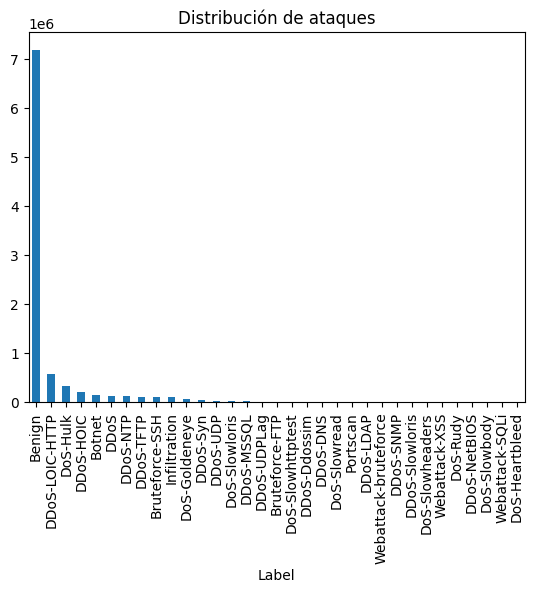

In [33]:
data['Label'].value_counts().plot(kind='bar', title='Distribución de ataques')
#print(data['Label'].value_counts())
print(data['Label'].str.contains('bruteforce', case=False).value_counts())
print(data['Label'].str.contains('portscan', case=False).value_counts())
print(data['Label'].str.contains('xss', case=False).value_counts())


In [34]:
data.rename(columns={'Label': 'AttackType'}, inplace=True)
data = data[data['AttackType'].str.contains('Webattack-Bruteforce|Webattack-XSS|Webattack-SQLi', case=False)]

data['AttackType'] = data['AttackType'].str.replace('Webattack-bruteforce', 'BruteForce', case=False)
data['AttackType'] = data['AttackType'].str.replace('Webattack-XSS', 'XSS', case=False)
data['AttackType'] = data['AttackType'].str.replace('Webattack-SQLi', 'SQLInjection', case=False)

print(data['AttackType'].value_counts())

AttackType
BruteForce      2020
XSS              876
SQLInjection      99
Name: count, dtype: int64


In [44]:
dataSmall = pd.read_csv('Datasets/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')

dataSmall.rename(columns={'Label': 'AttackType'}, inplace=True)
dataSmall.replace([np.inf, -np.inf], np.nan, inplace=True)
nan_values = dataSmall.isna().sum().sum()

dataSmall.dropna(inplace=True)

dataSmall['AttackType'] = dataSmall['AttackType'].str.replace('�', '-')

dataSmall['AttackType'] = dataSmall['AttackType'].str.replace('Web Attack - Brute Force', 'BruteForce', case=False)
dataSmall['AttackType'] = dataSmall['AttackType'].str.replace('Web Attack - XSS', 'XSS', case=False)
dataSmall['AttackType'] = dataSmall['AttackType'].str.replace('Web Attack - Sql Injection', 'SQLInjection', case=False)

dataSmall = dataSmall[dataSmall['AttackType'] != 'BENIGN']

print(dataSmall['AttackType'].value_counts())

AttackType
BruteForce      1507
XSS              652
SQLInjection      21
Name: count, dtype: int64


In [45]:
# Check if dataSmall and data have the same columns
columns_data = set(data.columns)
columns_dataSmall = set(dataSmall.columns)

if columns_data == columns_dataSmall:
    print("dataSmall and data have the same columns.")
else:
    print("dataSmall and data do not have the same columns.")
    print("Columns in data but not in dataSmall:", columns_data - columns_dataSmall)
    print("Columns in dataSmall but not in data:", columns_dataSmall - columns_data)
    
    shared_columns = columns_data.intersection(columns_dataSmall)
    print(f"Number of columns they share: {len(shared_columns)}")

dataSmall and data do not have the same columns.
Columns in data but not in dataSmall: set()
Columns in dataSmall but not in data: {'Total Length of Bwd Packets', 'Down/Up Ratio', 'Init_Win_bytes_backward', 'Fwd Packet Length Min', 'act_data_pkt_fwd', 'Total Length of Fwd Packets', 'Init_Win_bytes_forward', 'Fwd URG Flags', 'Fwd Avg Packets/Bulk', 'min_seg_size_forward', 'PSH Flag Count', 'Fwd Header Length.1', 'CWE Flag Count', 'ACK Flag Count', 'ECE Flag Count', 'Average Packet Size', 'Bwd Avg Bytes/Bulk', 'RST Flag Count', ' Destination Port', 'Fwd Avg Bulk Rate', 'FIN Flag Count', 'Bwd Avg Bulk Rate', 'Bwd Avg Packets/Bulk', 'Bwd PSH Flags', 'Min Packet Length', 'Bwd Packet Length Min', 'Max Packet Length', 'Fwd Avg Bytes/Bulk', 'Bwd URG Flags'}
Number of columns they share: 50


We have a considerable amount of atributes they share so the model can be trained on the combined data and then between Level 2 and Level 3 there should be a process to filter the data to the attributes that are shared between the two datasets.

AttackType
BruteForce      3527
XSS             1528
SQLInjection     120
Name: count, dtype: int64


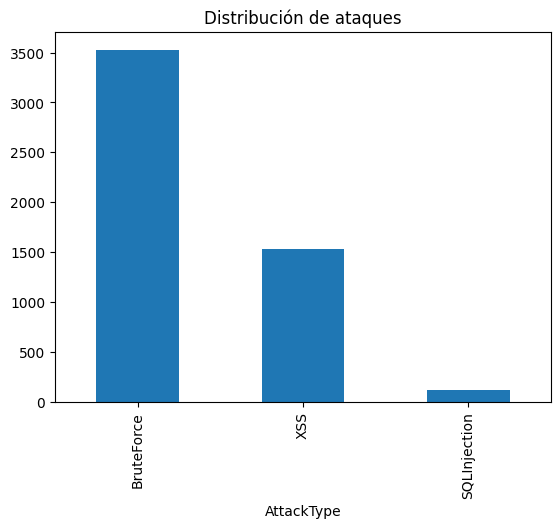

In [47]:
# Remove columns that are not shared
shared_columns = list(shared_columns)
data = data[shared_columns]
dataSmall = dataSmall[shared_columns]

# Concatenate the dataframes
data_combined = pd.concat([data, dataSmall], ignore_index=True)
data_combined.shape

data_combined['AttackType'].value_counts().plot(kind='bar', title='Distribución de ataques')
print(data_combined['AttackType'].value_counts())

We then now need to see if performance improves with the new data.

## New Level 3 Test

In [54]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from imblearn.over_sampling import SMOTE
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [48]:
X = data.drop(columns=['AttackType'])
y = data['AttackType']

In [50]:
target_classes = {
    "BruteForce": 50000,
    "XSS": 50000,
    "SQLInjection": 50000
}

smote = SMOTE(sampling_strategy=target_classes, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(y_resampled.value_counts())

AttackType
BruteForce      50000
XSS             50000
SQLInjection    50000
Name: count, dtype: int64


In [51]:
scaler = MinMaxScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

X_resampled_scaled = pd.DataFrame(X_resampled_scaled, columns=X_resampled.columns)

X_resampled_scaled.describe()

,Bwd IAT Max,Fwd IAT Mean,Flow Bytes/s,Bwd IAT Std,Total Backward Packets,Fwd IAT Min,Bwd IAT Min,Active Min,Packet Length Std,Fwd IAT Total,...,Active Mean,Fwd Packet Length Mean,Bwd Packet Length Max,Fwd Packets/s,Flow Duration,Subflow Fwd Packets,Bwd IAT Total,Flow IAT Mean,Fwd PSH Flags,Subflow Bwd Bytes
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.182316,0.034402,0.034021,0.164892,0.086103,0.004812,0.013293,0.021604,0.118071,0.085620,...,0.021604,0.098329,0.063371,0.011900,0.092445,0.081706,0.074899,0.027863,0.000007,0.060102
std,0.363726,0.073161,0.083469,0.346111,0.243539,0.057897,0.033145,0.144965,0.195090,0.173143,...,0.144965,0.161487,0.110845,0.040126,0.170714,0.240377,0.211313,0.071898,0.002582,0.210426
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000076,0.000000,0.000000,0.008772,0.000005,0.000000,0.000000,0.000000,0.000108,...,0.000000,0.000000,0.000000,0.000001,0.044451,0.009479,0.000000,0.003349,0.000000,0.000000
50%,0.000000,0.022238,0.000000,0.000000,0.008772,0.000012,0.000000,0.000000,0.000000,0.045324,...,0.000000,0.000000,0.000000,0.000002,0.045745,0.009479,0.000000,0.012725,0.000000,0.000000
75%,0.002012,0.048269,0.017877,0.001774,0.026316,0.000015,0.001503,0.000000,0.167825,0.050047,...,0.000000,0.185206,0.065954,0.000007,0.050459,0.014218,0.000188,0.032180,0.000000,0.002693
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
label_encoder = LabelEncoder()
y_resampled_encoded = label_encoder.fit_transform(y_resampled)
unique, counts = np.unique(y_resampled_encoded, return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(0): np.int64(50000), np.int64(1): np.int64(50000), np.int64(2): np.int64(50000)}


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled_encoded, test_size=0.2, random_state=42)


model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),  # Primera capa oculta con 128 nodos
    Dropout(0.3),  # Dropout para prevenir sobreajuste
    Dense(64, activation='relu'),  # Segunda capa oculta con 64 nodos
    Dropout(0.3),
    Dense(3, activation='softmax')  # Capa de salida para clasificación multiclase (3 clases)
])

# 6. Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',  # Para problemas multiclase
              metrics=['accuracy'])

y_train_one_hot = to_categorical(y_train, num_classes=3)
y_test_one_hot = to_categorical(y_test, num_classes=3)

# Entrenar el modelo
history = model.fit(X_train, y_train_one_hot, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluar el modelo
test_loss, test_accuracy = model.evaluate(X_test, y_test_one_hot)
print(f"Test Accuracy: {test_accuracy:.2f}")

Epoch 1/50


c:\Users\Nico\Desktop\UPC\PAE\SentinelX\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.6702 - loss: 0.6473 - val_accuracy: 0.7100 - val_loss: 0.5410
Epoch 2/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7200 - loss: 0.5329 - val_accuracy: 0.7457 - val_loss: 0.4860
Epoch 3/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7438 - loss: 0.4803 - val_accuracy: 0.7665 - val_loss: 0.4384
Epoch 4/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7594 - loss: 0.4463 - val_accuracy: 0.7530 - val_loss: 0.4290
Epoch 5/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7643 - loss: 0.4331 - val_accuracy: 0.7784 - val_loss: 0.4193
Epoch 6/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7665 - loss: 0.4297 - val_accuracy: 0.7768 - val_loss: 0.4114
Epoch 7/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7684 - loss: 0.4242 - val_accuracy: 0.7776 - val_loss: 0.4071
Epoch 8/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7717 - loss: 0.4205 - val_accurac

938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 857us/step


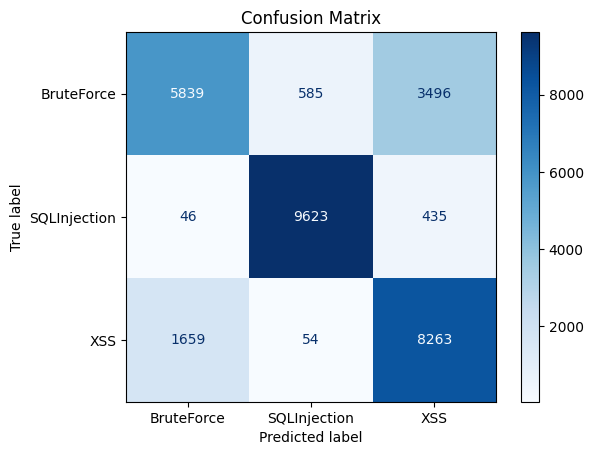

Accuracy: 0.79
Precision: 0.80
Recall: 0.79
F1 Score: 0.79


In [56]:

# Predict the labels for the test set
y_pred_nn = model.predict(X_test)
y_pred_nn_classes = np.argmax(y_pred_nn, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_nn_classes)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Calculate and print other performance metrics
accuracy = accuracy_score(y_test, y_pred_nn_classes)
precision = precision_score(y_test, y_pred_nn_classes, average='weighted')
recall = recall_score(y_test, y_pred_nn_classes, average='weighted')
f1 = f1_score(y_test, y_pred_nn_classes, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

## New aproach

We tried to use another NN for Level 3 classifing but the performance is not great. As we don't have a lot of data (at least real data) for the Level 3 classes we will try to use a XGBoost model to classify the Level 3 classes. XGBoost is powerful and adds randomness to the model, so it doesn't overfit.

In [62]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


In [63]:
# Asegúrate de que tus datos estén preparados correctamente
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled_encoded, test_size=0.2, random_state=42)

# Crear el modelo XGBoost
model_xgb = xgb.XGBClassifier(
    n_estimators=100,  # Número de árboles
    max_depth=6,  # Profundidad máxima de los árboles
    learning_rate=0.1,  # Tasa de aprendizaje
    objective='multi:softmax',  # Para clasificación multiclase
    num_class=3,  # Número de clases
    use_label_encoder=False  # Para evitar un warning
)

# Entrenar el modelo
model_xgb.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
y_pred = model_xgb.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")
print(f"Test Loss: {test_loss:.2f}")

c:\Users\Nico\Desktop\UPC\PAE\SentinelX\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [16:36:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 0.86
Test Loss: 0.45


#### Fine Tunning XGBoost

We are using `param_grid` to fine tune the model. We will use `GridSearchCV` to find the best parameters for the model. We will use the following parameters:

- `n_estimators`: Number of trees in the forest.
- `max_depth`: The maximum depth of the tree.
- `learning_rate`: The learning rate of the model.
- `subsample`: The fraction of samples to be used for fitting the individual base learners.
- `colsample_bytree`: The fraction of features to be used for fitting the individual base learners.

In [64]:
from sklearn.model_selection import GridSearchCV

# Definir el rango de parámetros para el ajuste
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Crear el modelo XGBoost
model_xgb = xgb.XGBClassifier(objective='multi:softmax', num_class=3, use_label_encoder=False)

# Realizar búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Mejor combinación de hiperparámetros
print("Best parameters found: ", grid_search.best_params_)

# Evaluar el modelo con los mejores hiperparámetros
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with GridSearchCV: {accuracy:.2f}")


Fitting 3 folds for each of 72 candidates, totalling 216 fits


c:\Users\Nico\Desktop\UPC\PAE\SentinelX\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [16:37:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Nico\Desktop\UPC\PAE\SentinelX\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [16:37:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Nico\Desktop\UPC\PAE\SentinelX\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [16:37:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 200, 'subsample': 0.8}
Test Accuracy with GridSearchCV: 0.96


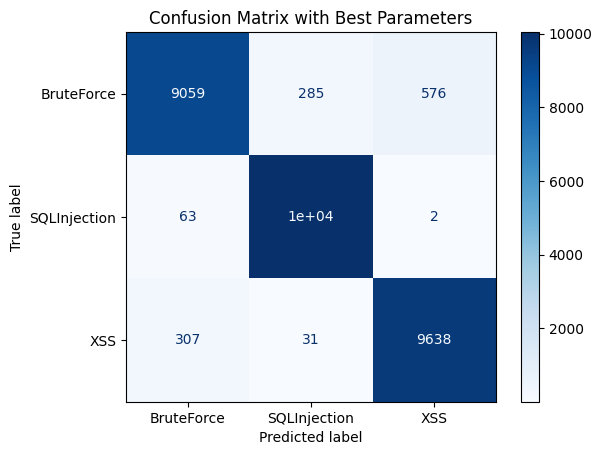

Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.96


In [65]:
# Use the best estimator from the grid search to predict the labels for the test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Compute the confusion matrix
cm_best = confusion_matrix(y_test, y_pred_best)

# Plot the confusion matrix
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=label_encoder.classes_)
disp_best.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix with Best Parameters')
plt.show()

# Calculate and print other performance metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')

print(f'Accuracy: {accuracy_best:.2f}')
print(f'Precision: {precision_best:.2f}')
print(f'Recall: {recall_best:.2f}')
print(f'F1 Score: {f1_best:.2f}')


As we can see, results are much better than any other model we've tried so far. We will use (at the moment) this model to classify the Level 3 classes.

In [ ]:
import joblib

# Save the model to a file
joblib_file = "LayerModels/lvl3_xgboost_model.pkl"
joblib.dump(best_model, joblib_file)

print(f"Model saved to {joblib_file}")

Model saved to Models/lvl3_xgboost_model.pkl
